# Visualization I
---

<div style="float:right; height:150 px">
    <img src="https://matplotlib.org/_static/logo2.png" alt="Matplotlib Logo" style="height: 150px;">
</div>

<div style="float:center; height:150 px">
    <img src="http://scitools.org.uk/images/cartopy.png" alt="CartoPy" style="height: 150px;">
</div>


<div style="float:right; width:70 px; height:70px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 70px;">
</div>

## Getting Help with Cartopy and Matplotlib

Here are some important resources for learning more about Cartopy and Matplotlib and getting help.

- [NCAR Hackathons Data Visualization in Python Guide](https://ncar-hackathons.github.io/visualization)
- [Matplotlib documentation](http://matplotlib.org)
- [Matplotlib `plot` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
- [Cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/)
- [Matplotlib GitHub Issue Tracker](https://github.com/matplotlib/matplotlib/issues)
- [Matplotlib questions on StackOverflow](https://stackoverflow.com/questions/tagged/matplotlib)
- [Cartopy questions on StackOverflow](https://stackoverflow.com/questions/tagged/cartopy)


## Learning Objectives

1. Recognize the basics of `matplotlib` figure elements.
1. Create a basic line plot, add labels, and grid lines to the plot.
1. Plot multiple series of data.
1. Plot `imshow`, `contour`, and filled contour (`contourf`) plots.
1. Introduction to `cartopy` and making maps.

## Anatomy of a figure
<img src="./img/anatomy-of-a-figure.png" width="500" height="500">

## Getting started

Use a [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions)
to set the backend of matplotlib to the 'inline' backend. This makes the `matplotlib` plots appear inline as images.


In [1]:
%matplotlib inline

Import `matplotlib`'s `pyplot` interface as well as `numpy`. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

Generate some data to use while experimenting with plotting:

In [4]:
times = np.array([ 93.,  96.,  99., 102., 105., 108., 111., 114., 117.,
                  120., 123., 126., 129., 132., 135., 138., 141., 144.,
                  147., 150., 153., 156., 159., 162.])
temps = np.array([310.7, 308.0, 296.4, 289.5, 288.5, 287.1, 301.1, 308.3,
                  311.5, 305.1, 295.6, 292.4, 290.4, 289.1, 299.4, 307.9,
                  316.6, 293.9, 291.2, 289.8, 287.1, 285.8, 303.3, 310.])

## Create a figure

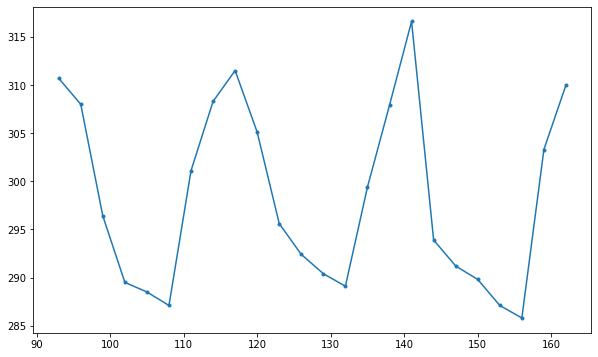

In [5]:
fig = plt.figure(figsize=(10, 6))

# get the first axis in a 1x1 grid of axes
ax = fig.add_subplot(1, 1, 1) #nrows=1, ncols=1, index=1)

# Plot a dotted line with x=time and y=temps
ax.plot(times, temps, '.-')

### Add some labels to the plot

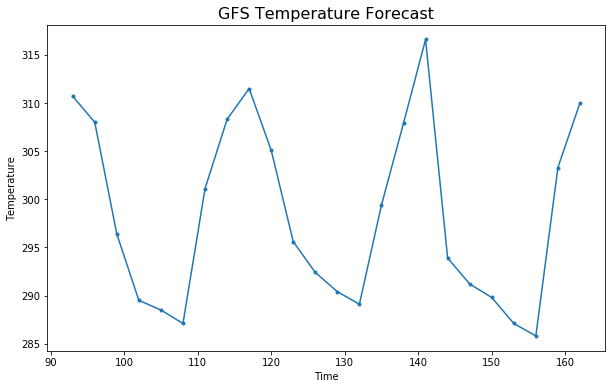

In [6]:
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# add a title
ax.set_title('GFS Temperature Forecast', fontdict={'size': 16})

# Prompt the notebook to re-display the figure after we modify it
fig

## imshow/contour
- `imshow` displays the values in an array as colored pixels, similar to a heat map.
- `contour` creates contours around data.
- `contourf` creates filled contours around data.

First let's create some fake data to work with - let's use a bivariate normal distribution.

In [7]:
x = y = np.arange(-3.0, 3.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

### Create a filled contour plot

The `cmap` argument specifies the 
[colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
to use. We can also specify the contour levels.

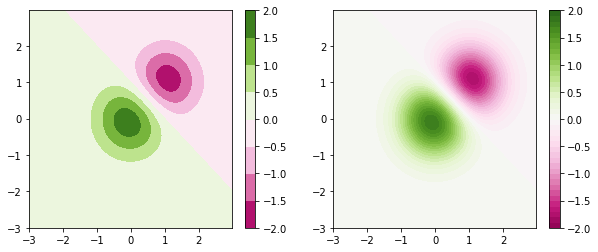

In [8]:
fig = plt.figure(figsize=(10, 4))

dz = 0.5
ax = fig.add_subplot(1, 2, 1)
c1 = ax.contourf(X, Y, Z, cmap='PiYG', levels=np.arange(-2., 2+dz, dz))
plt.colorbar(c1)

dz = 0.1
ax = fig.add_subplot(1, 2, 2)
c2 = ax.contourf(X, Y, Z, cmap='PiYG', levels=np.arange(-2., 2+dz, dz))
plt.colorbar(c2)

# Making maps

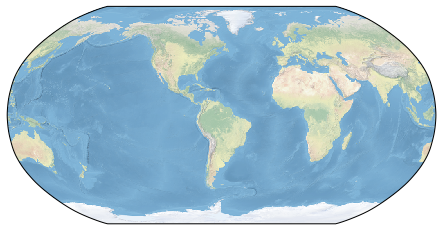

In [9]:
import cartopy
import cartopy.crs as ccrs

# use matplotlib's built-in transform support, same function calls
fig = plt.figure(figsize=(10, 4))
axm = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=300.))

# set the extent to global
axm.set_global()

# add standard background map
axm.stock_img()

### Quick look behind the scenes
<br>

Here's our original `pyplot` axis object:

In [10]:
print(ax)

AxesSubplot(0.547727,0.125;0.281818x0.755)


Notice that by setting the `projection` argument to `add_subplot`, the function return a different object type:

In [11]:
print(axm)

< GeoAxes: <cartopy.crs.Robinson object at 0x1165331a8> >


## A more sophisticated example

Load a dataset of dissolved oxygen concentration in the thermocline (400-600 m depth).

In [12]:
import xarray as xr
ds = xr.open_dataset('../datasets/woa2013/woa2013v2-O2-thermocline-ann.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    O2       (lat, lon) float32 ...
    dz       float32 ...
Attributes:
    title:       World Ocean Atlas 2013 version 2
    references:   Garcia H. E., T. P. Boyer, R. A. Locarnini, A. V. Mishonov,...

### Use `xarray`'s hooks to `matplotlib` to create a quick-look plot

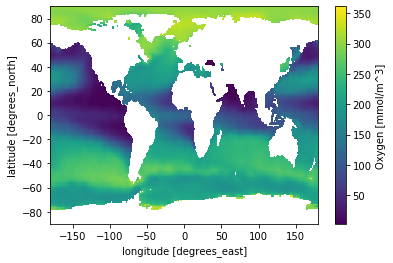

In [13]:
ds.O2.plot();

<img src="./img/01-woa_o2pdf_mortality_no3deficit.png" width="700">

<img src="./img/woa-thermocline-o2-map.png">

### Colormap normalization

- Objects that use colormaps by default linearly map the colors in the colormap from data values vmin to vmax.
- [Colormap normalization](https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html) provides a means of manipulating the mapping. 

For instance:

In [14]:
import matplotlib.colors as colors
norm = colors.Normalize(vmin=-1, vmax=1.)
norm(0.)

0.5

We can map data to colormaps in a non-linear fashion using other normalizations, for example:

In [15]:
norm = colors.LogNorm(vmin=1e-2, vmax=1e2)
np.array(norm([0.1, 1., 10., 100.]))

array([0.25, 0.5 , 0.75, 1.  ])

### ...back to oxygen
Set contour levels to non-uniform intervals and make the colormap centered at the hypoxic threshold using `DivergingNorm`.

In [16]:
levels = [0, 10, 20,  30, 40, 50, 60, 80, 100, 125, 150, 175, 200, 225, 
          250, 275, 300]

norm = colors.DivergingNorm(vmin=levels[0], vmax=levels[-1], vcenter=60.)

Add a cyclic point to accomodate the periodic domain.

In [17]:
from cartopy.util import add_cyclic_point
field, lon = add_cyclic_point(ds.O2, coord=ds.lon)
lat = ds.lat

### Putting all together...

In [18]:
%%capture
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))

# filled contours
cf = ax.contourf(lon, lat, field, levels=levels, norm=norm, cmap='RdBu',
                 transform=ccrs.PlateCarree());

# contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5,
                transform=ccrs.PlateCarree())

# add contour labels
lb = plt.clabel(cs, fontsize=6, inline=True, fmt='%r');

# land
land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('mmol m$^{-3}$')
ax.set_title('Thermocline dissolve oxygen');

plt.savefig('./img/woa-thermocline-o2-map.png', dpi=300, bbox_inches='tight')

#### The final product

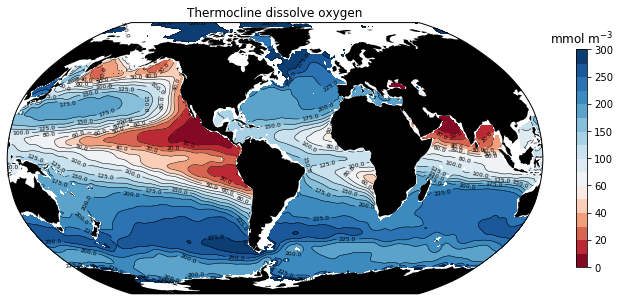

In [19]:
fig